In [31]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install ezodf
!{sys.executable} -m pip install pyclustering
import pandas as pd
import ezodf

var_x = 'x2'
var_y = 'y2'
var = 2

In [32]:
doc = ezodf.opendoc('data.ods')

print("Spreadsheet contains %d sheet(s)." % len(doc.sheets))
for sheet in doc.sheets:
    print("-"*40)
    print("   Sheet name : '%s'" % sheet.name)
    print("Size of Sheet : (rows=%d, cols=%d)" % (sheet.nrows(), sheet.ncols()) )

sheet = doc.sheets[0]
df_dict = {}
for i, row in enumerate(sheet.rows()):
    if i == 0:
        df_dict = {cell.value:[] for cell in row}
        col_index = {j:cell.value for j, cell in enumerate(row)}
        continue
    q = 0 
    for j, cell in enumerate(row):
        if q < var*2+1:
            df_dict[col_index[j]].append(cell.value)
            q+=1
df_dict = {var_x  : df_dict[var_x],var_y  : df_dict[var_y] }
df = pd.DataFrame(df_dict)
df = df[df[var_x] >= 0]

Spreadsheet contains 1 sheet(s).
----------------------------------------
   Sheet name : 'Лист1'
Size of Sheet : (rows=373, cols=21)


In [33]:
df.head()

,x2,y2
0,70.0,0.0
1,88.0,0.0
2,37.0,2.0
3,94.0,2.0
4,51.0,3.0


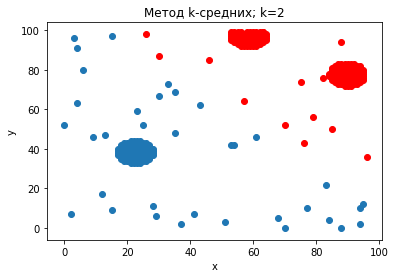

In [34]:
kmeans_2 = KMeans(init='random', n_clusters=2, n_init=10).fit(df)
kmeans_2.labels_
first_x = []
first_y = []
second_x = []
second_y = []
for i in range(len(kmeans_2.labels_)):
    if kmeans_2.labels_[i] == 1:
        first_x.append(df.loc[i][var_x])
        first_y.append(df.loc[i][var_y])
    if kmeans_2.labels_[i] == 0:
        second_x.append(df.loc[i][var_x])
        second_y.append(df.loc[i][var_y])
        

plt.scatter(first_x, first_y, None, "red")
plt.scatter(second_x, second_y)
plt.xlabel(u"х")
plt.ylabel(u"у")
plt.title("Метод k-cредних; k=2")
plt.savefig("2sr.png")        
plt.show()


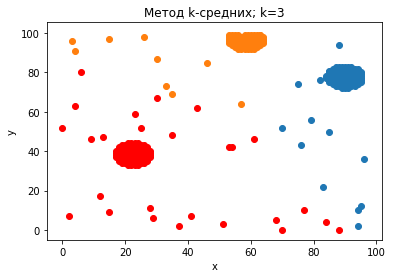

In [35]:
kmeans_2 = KMeans(init='random', n_clusters=3, n_init=10).fit(df)
kmeans_2.labels_
first_x = []
first_y = []
second_x = []
second_y = []
third_x = []
third_y = []
for i in range(len(kmeans_2.labels_)):
    if kmeans_2.labels_[i] == 1:
        first_x.append(df.loc[i][var_x])
        first_y.append(df.loc[i][var_y])
    if kmeans_2.labels_[i] == 0:
        second_x.append(df.loc[i][var_x])
        second_y.append(df.loc[i][var_y])
    if kmeans_2.labels_[i] == 2:
        third_x.append(df.loc[i][var_x])
        third_y.append(df.loc[i][var_y])
        

plt.scatter(first_x, first_y, c="red")
plt.scatter(second_x, second_y)
plt.scatter(third_x, third_y)
plt.xlabel(u"х")
plt.ylabel(u"у")
plt.title("Метод k-cредних; k=3")
plt.savefig("3sr.png")        
plt.show()


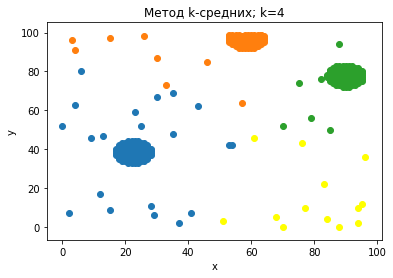

In [36]:
kmeans_2 = KMeans(init='random', n_clusters=4, n_init=10).fit(df)
kmeans_2.labels_
first_x = []
first_y = []
second_x = []
second_y = []
third_x = []
third_y = []
forth_x = []
forth_y = []
for i in range(len(kmeans_2.labels_)):
    if kmeans_2.labels_[i] == 1:
        first_x.append(df.loc[i][var_x])
        first_y.append(df.loc[i][var_y])
    if kmeans_2.labels_[i] == 0:
        second_x.append(df.loc[i][var_x])
        second_y.append(df.loc[i][var_y])
    if kmeans_2.labels_[i] == 2:
        third_x.append(df.loc[i][var_x])
        third_y.append(df.loc[i][var_y])
    if kmeans_2.labels_[i] == 3:
        forth_x.append(df.loc[i][var_x])
        forth_y.append(df.loc[i][var_y])    
        

plt.scatter(first_x, first_y)
plt.scatter(second_x, second_y)
plt.scatter(third_x, third_y, c="yellow")
plt.scatter(forth_x, forth_y)
plt.xlabel(u"х")
plt.ylabel(u"у")
plt.title("Метод k-cредних; k=4")
plt.savefig("4sr.png")        
plt.show()


In [37]:
data = []
for i in range(len(kmeans_2.labels_)):
    data.append([df.loc[i][var_x],df.loc[i][var_y]])

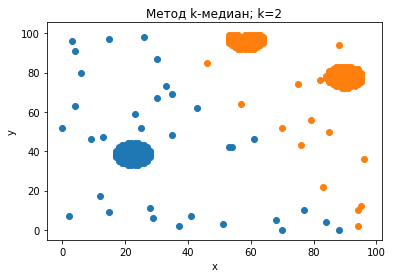

In [38]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
sample = data
initial_medians = [[df.iloc[0][var_x], df.iloc[0][var_y]], [df.iloc[220][var_x], df.iloc[220][var_y]]]
kmedians_instance = kmedians(sample, initial_medians)
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)

first_x = []
first_y = []
second_x = []
second_y = []

for i in clusters[0]:
    first_x.append(df.loc[i][var_x])
    first_y.append(df.loc[i][var_y])
for i in clusters[1]:
    second_x.append(df.loc[i][var_x])
    second_y.append(df.loc[i][var_y])
   
        

plt.scatter(first_x, first_y)
plt.scatter(second_x, second_y)
plt.xlabel(u"х")
plt.ylabel(u"у")
plt.title("Метод k-медиан; k=2")
plt.savefig("2m.png")
plt.show()


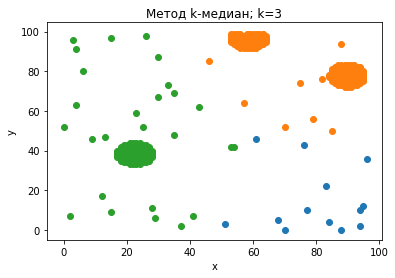

In [39]:
sample = data
initial_medians = [[df.iloc[0][var_x], df.iloc[0][var_y]], [df.iloc[220][var_x], df.iloc[220][var_y]], [df.iloc[110][var_x], df.iloc[110][var_y]]]
kmedians_instance = kmedians(sample, initial_medians)
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)

first_x = []
first_y = []
second_x = []
second_y = []
third_x = []
third_y = []

for i in clusters[0]:
    first_x.append(df.loc[i][var_x])
    first_y.append(df.loc[i][var_y])
for i in clusters[1]:
    second_x.append(df.loc[i][var_x])
    second_y.append(df.loc[i][var_y])
for i in clusters[2]:
    third_x.append(df.loc[i][var_x])
    third_y.append(df.loc[i][var_y])
   
        

plt.scatter(first_x, first_y)
plt.scatter(second_x, second_y)
plt.scatter(third_x, third_y)
plt.xlabel(u"х")
plt.ylabel(u"у")
plt.title("Метод k-медиан; k=3")
plt.savefig("3m.png")
plt.show()

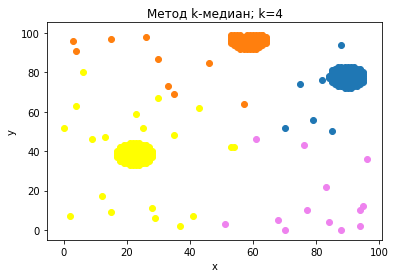

In [40]:
sample = data
initial_medians = [[df.iloc[0][var_x], df.iloc[0][var_y]], [df.iloc[220][var_x], df.iloc[220][var_y]], 
                   [df.iloc[110][var_x], df.iloc[110][var_y]], [df.iloc[330][var_x], df.iloc[330][var_y]]]
kmedians_instance = kmedians(sample, initial_medians)

kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)

first_x = []
first_y = []
second_x = []
second_y = []
third_x = []
third_y = []
forth_x = []
forth_y = []
for i in clusters[0]:
    first_x.append(df.loc[i][var_x])
    first_y.append(df.loc[i][var_y])
for i in clusters[1]:
    second_x.append(df.loc[i][var_x])
    second_y.append(df.loc[i][var_y])
for i in clusters[2]:
    third_x.append(df.loc[i][var_x])
    third_y.append(df.loc[i][var_y])
for i in clusters[3]:
    forth_x.append(df.loc[i][var_x])
    forth_y.append(df.loc[i][var_y])
      
        

plt.scatter(first_x, first_y,c='violet')
plt.scatter(second_x, second_y)
plt.scatter(third_x, third_y, c="yellow")
plt.scatter(forth_x, forth_y)
plt.xlabel(u"х")
plt.ylabel(u"у")
plt.title("Метод k-медиан; k=4")
plt.savefig("4m.png")
plt.show()
